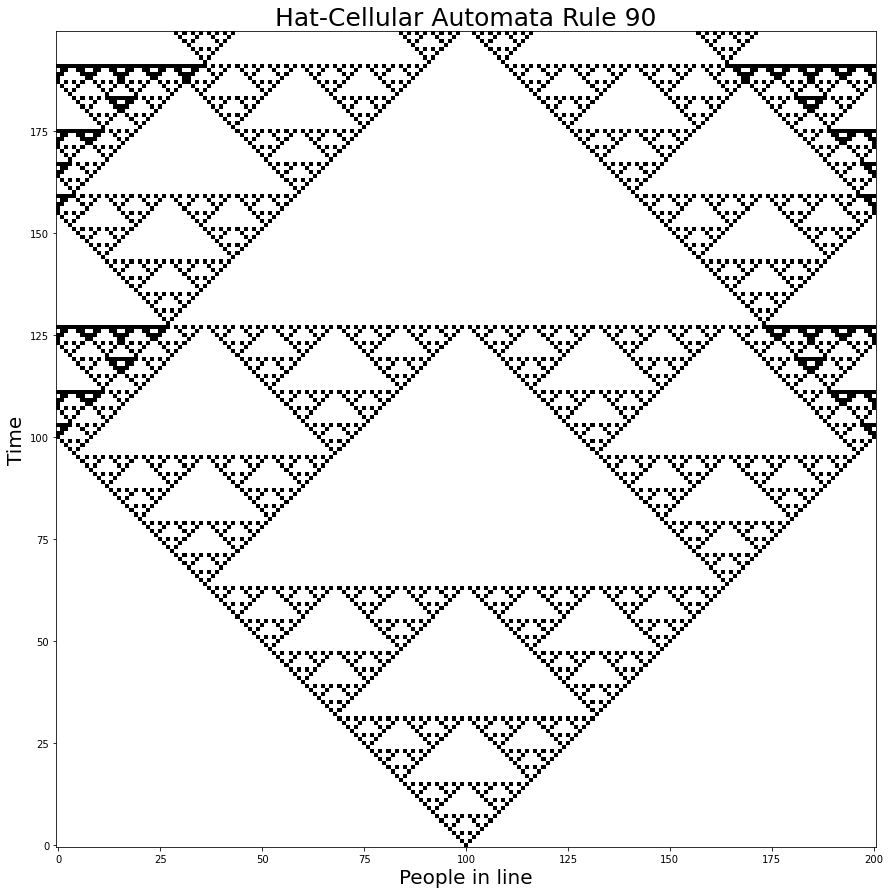

In [7]:
import numpy as np
import matplotlib.pyplot as plt

number = 90 #rule number
output_pattern = [int(x) for x in np.binary_repr(number,width=8)] #puts binary form of rule number in an array

input_pattern = np.zeros([8,3])
for i in range(8):
    input_pattern[i, :] = [int(x) for x in np.binary_repr(7-i, width = 3)] #8 different states of 1 & 0 in 8*3 matrix
    
columns = 201 #shows how many people are in the line(cells)
rows = 200 #shows time(steps)
shape = np.zeros([rows, columns+2]) #matrix that will show how people put on a hat over time 
shape[0,int(columns/2)+1] = 1 #the middle cell is black at t=0
A = np.zeros([rows, 4]) #used as an empty matrix and the boundary cells will be moved into it 

for i in np.arange(0, rows-1): #over time
    for j in np.arange(1,columns+1):#over people in line
         for k in range(8):#8 different states of neighbourhood
                if j<198: #because 198 is the last number in line that 198+3 is smaller than 201(we'll look at j%201 and (j+3)%201)
                    if np.array_equal(input_pattern[k,:],shape[i,j%201:(j+3)%201]):#which state the cell and its neighbours have
                        shape[i+1,(j+1)%201] = output_pattern[k]#determines the middle cell in neighbourhood for next time
               
                #we want make sure about Periodic Conditions
                #from here the cells(j) with j+3>=201 are treated differently by using matrix A
                if j == 198:
                    A[i,1] = shape[i,198]
                    A[i,2] = shape[i,199]
                    A[i,3] = shape[i,200]
                    if np.array_equal(input_pattern[k,:],A[i,1:4]):
                        shape[i+1,199] = output_pattern[k]  
            
                if j == 199:
                    A[i,1] = shape[i,199]
                    A[i,2] = shape[i,200]
                    A[i,3] = shape[i,201]
                    if np.array_equal(input_pattern[k,:],A[i,1:4]):
                        shape[i+1,200] = output_pattern[k]                           
                if j == 200:
                    A[i,1] = shape[i,200]
                    A[i,2] = shape[i,201]
                    A[i,3] = shape[i,1]
                    if np.array_equal(input_pattern[k,:],A[i,1:4]):
                        shape[i+1,201] = output_pattern[k]
                if j == 201:
                    A[i,1] = shape[i,201]
                    A[i,2] = shape[i,1]
                    A[i,3] = shape[i,2]
                    if np.array_equal(input_pattern[k,:],A[i,1:4]):
                        shape[i+1,1] = output_pattern[k] 
                        
plt.figure(figsize=(15,15))
plt.imshow(shape[:,1:columns+1], cmap = 'Greys', interpolation = 'nearest', origin='lower')#showing the final result
plt.title("Hat-Cellular Automata Rule {}".format(number),fontsize = 25)
plt.xlabel('People in line', fontsize = 20)
plt.ylabel('Time', fontsize = 20)
plt.show()